# Analysis of Military Defense Spending per country over time for NATO and non-NATO countries
## by Torben Scaffidi

In [1]:
# import libs
import pandas as pd
import numpy as np

# read in data
df_GDP = pd.read_csv(r'C:\Users\z003cbjk\Desktop\Python\Coursera Capstone\Data\GDP_WORLDWIDE.csv', sep = ';')
df_MDS = pd.read_csv(r'C:\Users\z003cbjk\Desktop\Python\Coursera Capstone\Data\Military Expenditure.csv', sep = ',')
df_NATO = pd.read_csv(r'C:\Users\z003cbjk\Desktop\Python\Coursera Capstone\Data\NATO_MEMBERS.csv', sep = ';')

In [2]:
# drop columns
df_GDP = df_GDP.drop(['Country Code', 'Indicator Name','Indicator Code'], axis=1)
df_MDS = df_MDS.drop(['Code', 'Type','Indicator Name'], axis=1)
df_NATO = df_NATO.drop(['Region', 'Area','Population'], axis=1)

In [3]:
# transpose
df_GDP_T = df_GDP.melt(id_vars=['Country Name'], value_vars=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'])
df_MDS_T = df_MDS.melt(id_vars=['Name'], value_vars=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'])

In [4]:
# rename
df_GDP_T = df_GDP_T.rename(columns={"variable": "Year", "value": "GDP","Country Name": "Country_Name"})
df_MDS_T = df_MDS_T.rename(columns={"variable": "Year", "value": "MDS", "Name": "Country_Name"})
df_NATO = df_NATO.rename(columns={"Country": "Country_Name"})

In [5]:
# join gdp and mds
df_ALL = pd.merge(df_MDS_T, df_GDP_T,  how='left', left_on=['Country_Name','Year'], right_on = ['Country_Name','Year'])

In [6]:
# join NATO info
df_ALL_NATO = df_ALL[df_ALL.Country_Name.isin(df_NATO['Country_Name'].to_list())]
df_ALL_NOT = df_ALL[~df_ALL.Country_Name.isin(df_NATO['Country_Name'].to_list())]

In [7]:
#drop all NA
df_ALL = df_ALL.dropna()
df_ALL_NATO = df_ALL_NATO.dropna()
df_ALL_NOT = df_ALL_NOT.dropna()

In [8]:
df_ALL['MDS_per_GDP']=df_ALL['MDS']/df_ALL['GDP']
df_ALL_NATO['MDS_per_GDP']=df_ALL_NATO['MDS']/df_ALL_NATO['GDP']
df_ALL_NOT['MDS_per_GDP']=df_ALL_NOT['MDS']/df_ALL_NOT['GDP']
df_ALL_GER = df_ALL_NATO[df_ALL_NATO.Country_Name== 'Germany']

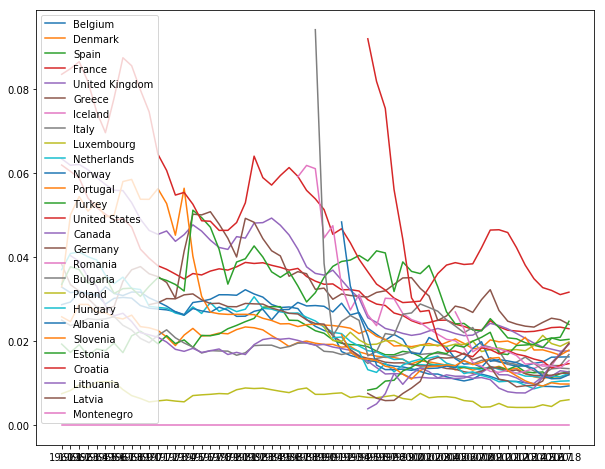

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
classes = list(df_ALL_NATO.Country_Name.unique())
for c in classes:
    df2 = df_ALL_NATO.loc[df_ALL_NATO['Country_Name'] == c]
    plt.plot(df2['Year'], df2['MDS_per_GDP'], label=c)
plt.legend()

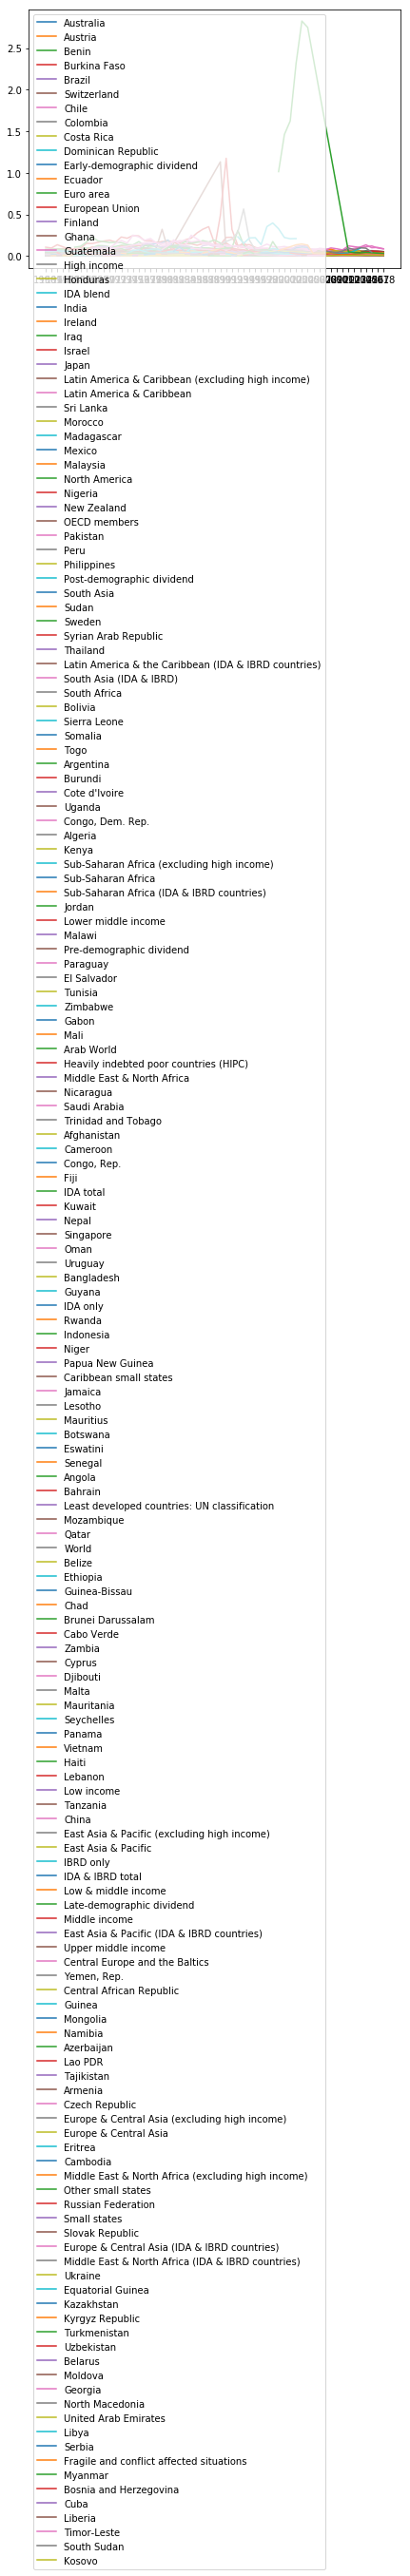

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
classes = list(df_ALL_NOT.Country_Name.unique())
for c in classes:
    df2 = df_ALL_NOT.loc[df_ALL_NOT['Country_Name'] == c]
    plt.plot(df2['Year'], df2['MDS_per_GDP'], label=c)
plt.legend()

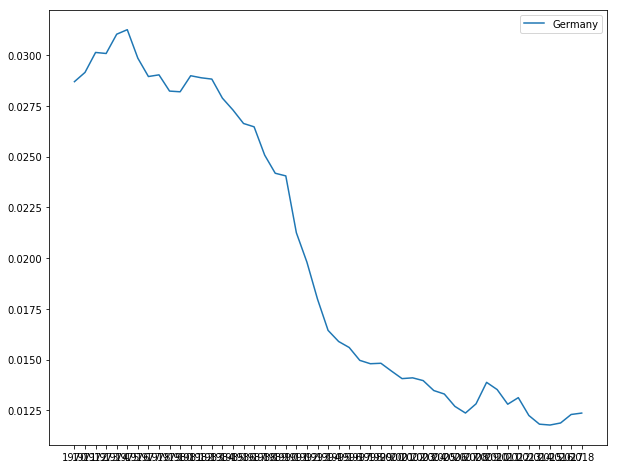

In [11]:
import matplotlib.pyplot as plt2

fig, ax = plt2.subplots(figsize=(10,8))
classes = list(df_ALL_GER.Country_Name.unique())
for c in classes:
    df2 = df_ALL_GER.loc[df_ALL_GER['Country_Name'] == c]
    plt2.plot(df2['Year'], df2['MDS_per_GDP'], label=c)
plt2.legend()

In [12]:
ratio_in_target_NATO= df_ALL_NATO[df_ALL_NATO.MDS_per_GDP >= 0.02].count()/(df_ALL_NATO.count())
ratio_in_target_NATO

Country_Name    0.494243
Year            0.494243
MDS             0.494243
GDP             0.494243
MDS_per_GDP     0.494243
dtype: float64

In [13]:
ratio_in_target_NOT = df_ALL_NOT[df_ALL_NOT.MDS_per_GDP >= 0.02].count()/(df_ALL_NOT.count())
ratio_in_target_NOT

Country_Name    0.493107
Year            0.493107
MDS             0.493107
GDP             0.493107
MDS_per_GDP     0.493107
dtype: float64

In [14]:
ratio_in_target_NATO_2018= df_ALL_NATO[(df_ALL_NATO.MDS_per_GDP >= 0.02) & (df_ALL_NATO.Year == "2018")].count()/(df_ALL_NATO[df_ALL_NATO.Year == "2018"].count())
ratio_in_target_NATO_2018

Country_Name    0.185185
Year            0.185185
MDS             0.185185
GDP             0.185185
MDS_per_GDP     0.185185
dtype: float64

In [15]:
ratio_in_target_NOT_2018= df_ALL_NOT[(df_ALL_NOT.MDS_per_GDP >= 0.02) & (df_ALL_NOT.Year == "2018")].count()/(df_ALL_NOT[df_ALL_NOT.Year == "2018"].count())
ratio_in_target_NOT_2018

Country_Name    0.283951
Year            0.283951
MDS             0.283951
GDP             0.283951
MDS_per_GDP     0.283951
dtype: float64

In [16]:
from pmdarima.arima import auto_arima
df_arima=df_ALL_GER[['Year', 'MDS_per_GDP']]
df_arima['Year']=df_arima['Year'].astype(int)

C:\Users\z003cbjk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [18]:
model = ARIMA(df_arima.MDS_per_GDP, order=(5,1,0))
model_fit = model.fit(disp=0)

C:\Users\z003cbjk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\z003cbjk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
output = model_fit.forecast()
output[0]

array([0.0123109])